# Chapter 5 Convnet

In [1]:
import numpy as np
import pandas as pd

from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Load Data

In [2]:
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

11493376/11490434 [==============================] - 30s 3us/step


In [4]:
def convert_image_data(data):
    return data.reshape(data.shape + (1,)).astype('float32') / 255

train_images = convert_image_data(train_images_raw)
test_images = convert_image_data(test_images_raw)

train_labels = to_categorical(train_labels_raw)
test_labels = to_categorical(test_labels_raw)

input_shape = train_images[0].shape
output_shape = train_labels.shape[1]

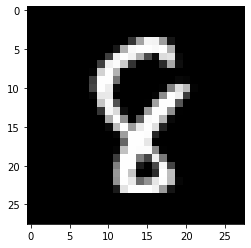

In [10]:
plt.imshow(train_images_raw[np.random.randint(len(train_images_raw))], cmap='gray')
plt.show()

## Train Model

In [11]:
def create_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(output_shape, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

In [12]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [ ]:
history = model.fit(
    train_images,
    train_labels,
    epochs=8,
    batch_size=64,
    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
 6336/48000 [==>...........................] - ETA: 54s - loss: 0.7938 - accuracy: 0.7571

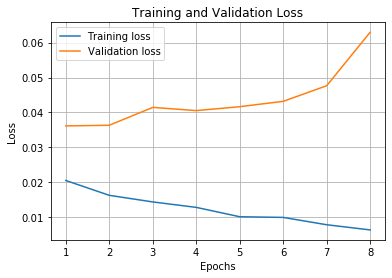

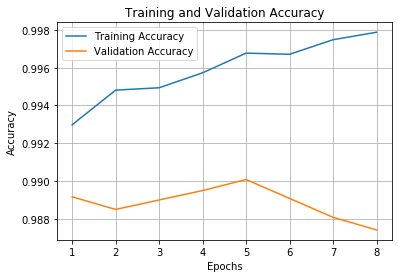

In [109]:
val_loss_values = history.history['val_loss']
loss_values = history.history['loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.gca().grid()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.gca().grid()
plt.show()

In [111]:
model = create_model()
history = model.fit(
    train_images,
    train_labels,
    epochs=4,
    batch_size=64)

Epoch 1/4
60000/60000 [==============================] - 51s 858us/step - loss: 0.1839 - accuracy: 0.9422
Epoch 2/4
60000/60000 [==============================] - 51s 844us/step - loss: 0.0514 - accuracy: 0.9838
Epoch 3/4
60000/60000 [==============================] - 50s 839us/step - loss: 0.0371 - accuracy: 0.9884
Epoch 4/4
60000/60000 [==============================] - 51s 844us/step - loss: 0.0287 - accuracy: 0.9910


## Test

In [112]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_acc}")

10000/10000 [==============================] - 3s 340us/step
Test Loss:     0.02475010161046521
Test Accuracy: 0.9919999837875366


## Examine Results

In [113]:
test_results_p = pd.DataFrame(model.predict(test_images))

test_results = pd.DataFrame()
test_results['Actual'] = test_labels_raw
test_results['Predicted'] = test_results_p.idxmax(axis=1)
test_results['Probability'] = test_results_p.max(axis=1)

Actual         3.000000
Predicted      5.000000
Probability    0.999207
Name: 449, dtype: float64


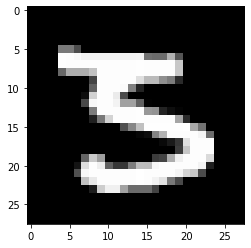

Actual         6.000000
Predicted      0.000000
Probability    0.996741
Name: 3422, dtype: float64


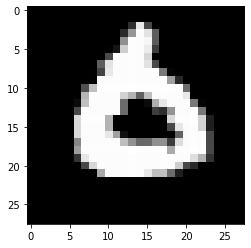

Actual         5.000000
Predicted      3.000000
Probability    0.996349
Name: 2597, dtype: float64


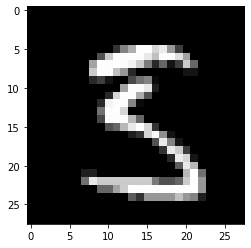

Actual         4.000000
Predicted      9.000000
Probability    0.994636
Name: 2130, dtype: float64


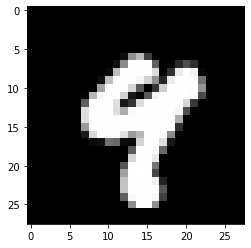

Actual         8.000000
Predicted      9.000000
Probability    0.991736
Name: 947, dtype: float64


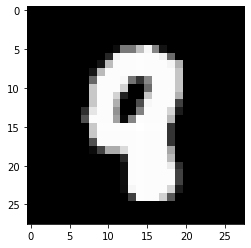

In [114]:
mis_classified = test_results[test_results.Actual != test_results.Predicted].sort_values(by='Probability', ascending=False)

for idx, mc in mis_classified.head(5).iterrows():
    print(mc)
    plt.imshow(test_images_raw[mc.name], cmap='gray')
    plt.show()